<a href="https://colab.research.google.com/github/sftSalman/tensoflowMaster/blob/main/lamdaFucntion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow==2.3.0.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320.4 MB 45 kB/s 
     |████████████████████████████████| 2.9 MB 15.5 MB/s 
     |████████████████████████████████| 459 kB 51.0 MB/s 
     |████████████████████████████████| 20.1 MB 67.4 MB/s 
     |████████████████████████████████| 26.1 MB 1.4 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
 

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import  Dense , Input , Lambda , Flatten
from tensorflow.keras.models import Model 
#from tensorflow.nn import relu , softmax
#from tensorflow.nn import relu, 
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as k
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np


In [11]:
(train_data, train_label),(test_data, test_label) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [12]:
train_data.shape

(60000, 28, 28)

In [13]:
test_data.shape

(10000, 28, 28)

In [14]:
import matplotlib.pyplot as plt

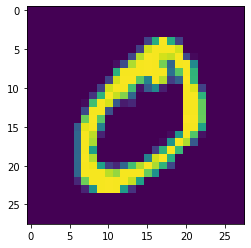

In [15]:
plt.imshow(train_data[1])

In [16]:
train_data = train_data/255.0
test_data = test_data/255.0
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [17]:
input = Input(shape=(28,28),name='input_layer')
flatten = Flatten(name='flatten_layer')(input)


In [20]:
layer_with_activation = Dense(128 , activation=tf.keras.activations.relu , name='layer_with_activation')(flatten)
output_layer_with_activation = Dense(10 , activation=tf.keras.activations.softmax , name="output_layer_with_activation")(layer_with_activation)
model_with_activation = Model(inputs = input , outputs = output_layer_with_activation)
model_with_activation.compile(optimizer = RMSprop() , loss = categorical_crossentropy , metrics = ['acc'])
model_with_activation.summary()
model_with_activation.fit(train_data , train_label , epochs=5)
model_with_activation.evaluate(test_data , test_label)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 28, 28)]          0         
                                                                 
 flatten_layer (Flatten)     (None, 784)               0         
                                                                 
 layer_with_activation (Dens  (None, 128)              100480    
 e)                                                              
                                                                 
 output_layer_with_activatio  (None, 10)               1290      
 n (Dense)                                                       
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 

[0.08821716904640198, 0.9754999876022339]

In [21]:
model_lambda = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Lambda(lambda x : tf.abs(x)),
    tf.keras.layers.Dense(10 , activation='softmax')
])

model_lambda.compile(optimizer = RMSprop() , loss = categorical_crossentropy , metrics = ['acc'])
model_lambda.summary()
model_lambda.fit(train_data , train_label , epochs=5)
model_lambda.evaluate(test_data , test_label)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 lambda (Lambda)             (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2087 - acc: 0.9402
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0908 - ac

[0.09299222379922867, 0.9747999906539917]

In [22]:
def myRelu(x):
    return k.maximum(x , 0.0)


In [23]:
model_lambda_func = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Lambda(myRelu),
    tf.keras.layers.Dense(10 , activation='softmax')
])

model_lambda_func.compile(optimizer = RMSprop() , loss = categorical_crossentropy , metrics = ['acc'])
model_lambda_func.summary()
model_lambda_func.fit(train_data , train_label , epochs=5)
model_lambda_func.evaluate(test_data , test_label)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 lambda_1 (Lambda)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2579 - acc: 0.9270
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1194 - 

[0.08661724627017975, 0.9764999747276306]